In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("simulated_transaction_2024.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230596 entries, 0 to 230595
Data columns (total 7 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Date                    230367 non-null  object 
 1   Timestamp               230345 non-null  object 
 2   Account No              230372 non-null  float64
 3   Balance                 230350 non-null  float64
 4   Amount                  230387 non-null  float64
 5   Third Party Account No  6832 non-null    float64
 6   Third Party Name        223517 non-null  object 
dtypes: float64(4), object(3)
memory usage: 12.3+ MB


In [3]:
df.head()

,Date,Timestamp,Account No,Balance,Amount,Third Party Account No,Third Party Name
0,01/01/2023,00:00,678330503.0,2971.0,1584.0,NaN,Westport Care Home
1,01/01/2023,00:00,472213568.0,3792.0,1950.0,NaN,Barbiee Boutique
2,01/01/2023,00:00,472213568.0,3012.0,-780.0,283027736.0,NaN
3,01/01/2023,00:00,283027736.0,1787.0,780.0,472213568.0,NaN
4,01/01/2023,00:00,624500124.0,3226.0,1825.0,NaN,Fat Face


In [4]:
print(df.isnull().sum())

Date                         229
Timestamp                    251
Account No                   224
Balance                      246
Amount                       209
Third Party Account No    223764
Third Party Name            7079
dtype: int64


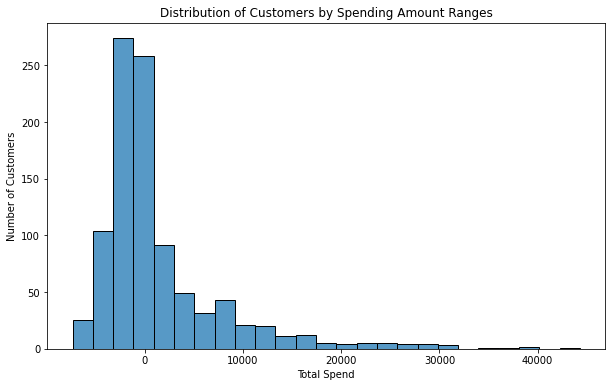

In [5]:
total_spend_per_customer = df.groupby('Account No')['Amount'].sum()

plt.figure(figsize=(10, 6))
sns.histplot(total_spend_per_customer, bins=25)
plt.title('Distribution of Customers by Spending Amount Ranges')
plt.xlabel('Total Spend')
plt.ylabel('Number of Customers')
plt.show()

<ipython-input-9-eff39af62d31>:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Date'] = pd.to_datetime(df['Date'])


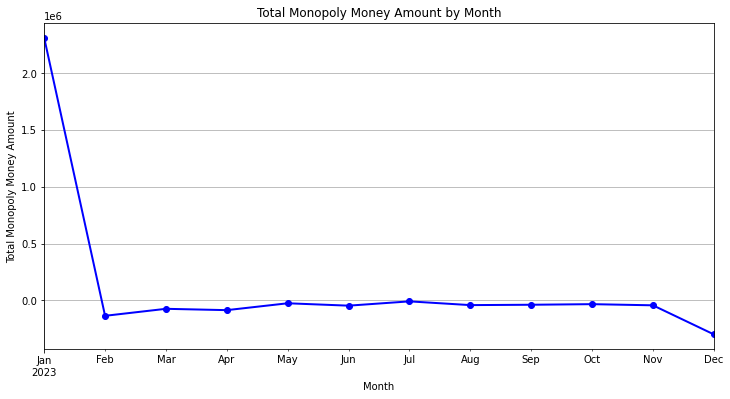

In [9]:
df['Date'] = pd.to_datetime(df['Date'])
monthly_sum = df.groupby(df['Date'].dt.to_period('M'))['Amount'].sum()

plt.figure(figsize=(12, 6))
monthly_sum.plot(kind='line', marker='o', color='b', linewidth=2)
plt.title('Total Monopoly Money Amount by Month')
plt.xlabel('Month')
plt.ylabel('Total Monopoly Money Amount')
plt.grid(True)
plt.show()

In [7]:
january_data = df[df['Date'].dt.month == 1]
daily_january_sum = january_data.groupby(january_data['Date'].dt.date)['Amount'].sum()

plt.figure(figsize=(12, 6))
daily_january_sum.plot(kind='line', marker='o', color='b', linewidth=2)
plt.title('Daily Transaction Amount in January')
plt.xlabel('Date')
plt.ylabel('Total Monopoly Money Amount')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(True)
plt.show()

AttributeError: Can only use .dt accessor with datetimelike values

Total Deposits:  19841151.0
Total Withdrawals:  18357984.72


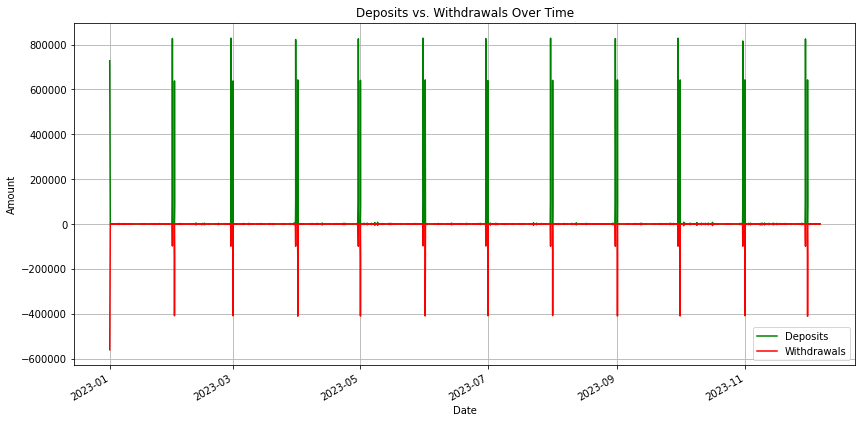

In [8]:
# Ensure date and timestamp are combined and converted to datetime format
df['Datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Timestamp'], format='%d/%m/%Y %H:%M')

# Classify transactions based on the sign of the transaction amount
df['Transaction Type'] = df['Amount'].apply(lambda x: 'Deposit' if x >= 0 else 'Withdrawal')

# Calculate the total amounts for deposits and withdrawals
total_deposits = df[df['Transaction Type'] == 'Deposit']['Amount'].sum()
total_withdrawals = abs(df[df['Transaction Type'] == 'Withdrawal']['Amount'].sum())  # Absolute value for withdrawals

# Print total deposits and withdrawals
print("Total Deposits: ", total_deposits)
print("Total Withdrawals: ", total_withdrawals)

# Group data by datetime and transaction type to sum amounts
time_series_data = df.groupby(['Datetime', 'Transaction Type'])['Amount'].sum().unstack().fillna(0)

# Plot the data
plt.figure(figsize=(14, 7))
time_series_data['Deposit'].plot(color='green', label='Deposits')
time_series_data['Withdrawal'].plot(color='red', label='Withdrawals')
plt.title('Deposits vs. Withdrawals Over Time')
plt.xlabel('Date')
plt.ylabel('Amount')
plt.legend()
plt.grid(True)
plt.show()


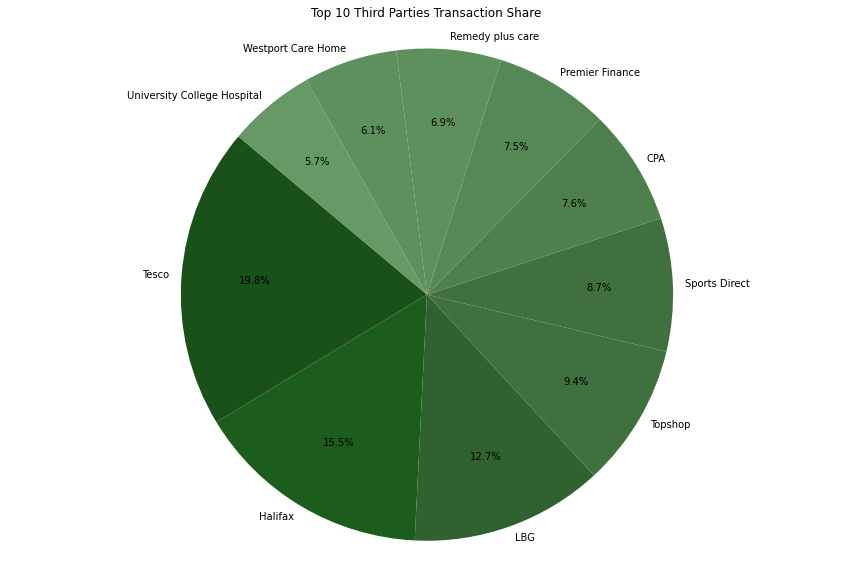

In [78]:
# Filter data to include only rows with non-null third party names
third_party_data = df[df['Third Party Name'].notna()]

# Group data by third party name and sum amounts
third_party_sums = third_party_data.groupby('Third Party Name')['Amount'].sum().abs()

# Select top 10 third parties for a cleaner pie chart visualization
top_third_parties = third_party_sums.nlargest(10)

# Define a green color palette
colors = ['#1A501A','#1C5C1C','#306230', '#407040', '#407040', '#4E804E', '#558855', '#5E905E', '#5E905E', '#669966']

# Plotting the pie chart with adjusted label distances and green colors
plt.figure(figsize=(15, 10))
plt.pie(top_third_parties, labels=top_third_parties.index, autopct='%1.1f%%', startangle=140, pctdistance=0.7,labeldistance=1.05, colors=colors)
plt.title('Top 10 Third Parties Transaction Share')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


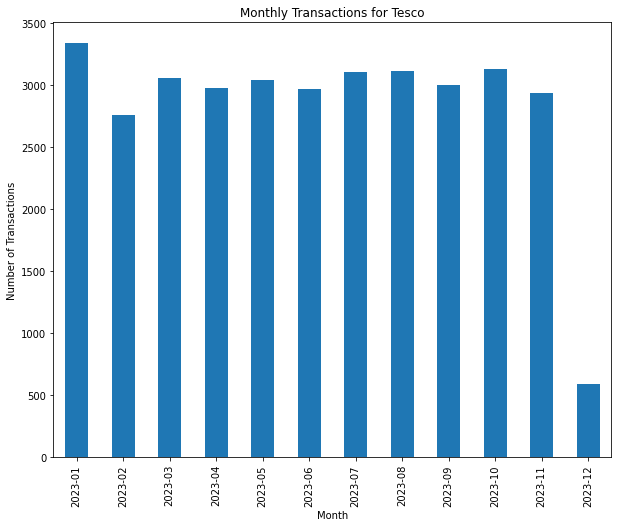

In [49]:
# Convert 'Date' and 'Timestamp' into a single datetime column for easier analysis
df['Datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Timestamp'], dayfirst=True)

# Analyze the transaction volume per third party over time
# Group by third party and date, then count the number of transactions
df['Month'] = df['Datetime'].dt.to_period("M")
third_party_volume = df.groupby(['Third Party Name', 'Month']).size().unstack(fill_value=0)

# Visualize the data for a particular third party, e.g., Tesco
tesco_transactions = third_party_volume.loc['Tesco']
plt.figure(figsize=(10, 8))
tesco_transactions.plot(kind='bar')
plt.title('Monthly Transactions for Tesco')
plt.ylabel('Number of Transactions')
plt.xlabel('Month')
plt.show()

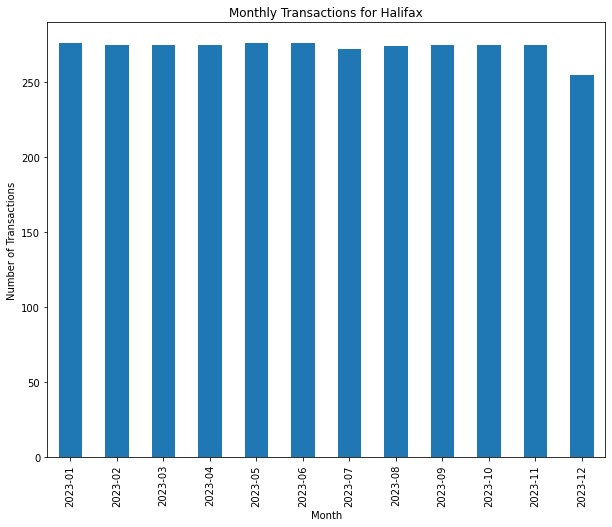

In [50]:
Halifax_transactions = third_party_volume.loc['Halifax']
plt.figure(figsize=(10, 8))
Halifax_transactions.plot(kind='bar')
plt.title('Monthly Transactions for Halifax')
plt.ylabel('Number of Transactions')
plt.xlabel('Month')
plt.show()

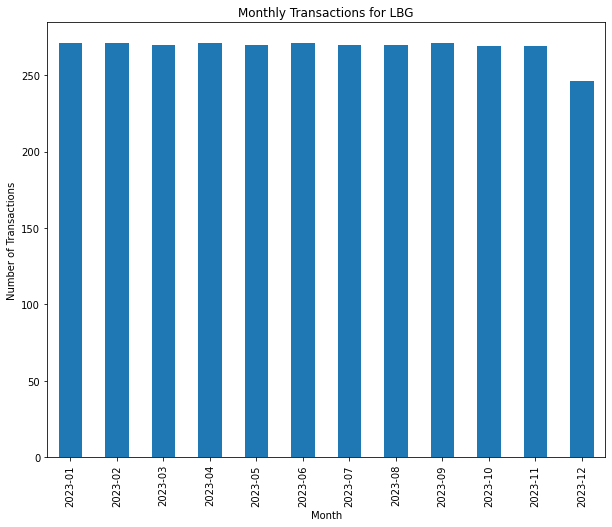

In [52]:
LBG_transactions = third_party_volume.loc['LBG']
plt.figure(figsize=(10, 8))
LBG_transactions.plot(kind='bar')
plt.title('Monthly Transactions for LBG')
plt.ylabel('Number of Transactions')
plt.xlabel('Month')
plt.show()

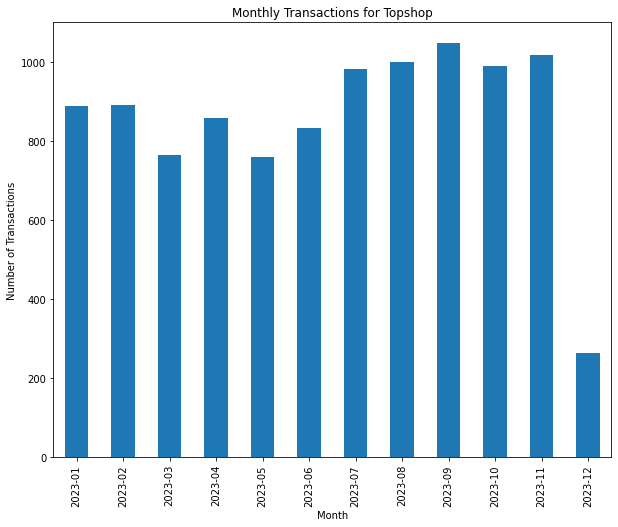

In [53]:
Topshop_transactions = third_party_volume.loc['Topshop']
plt.figure(figsize=(10, 8))
Topshop_transactions.plot(kind='bar')
plt.title('Monthly Transactions for Topshop')
plt.ylabel('Number of Transactions')
plt.xlabel('Month')
plt.show()

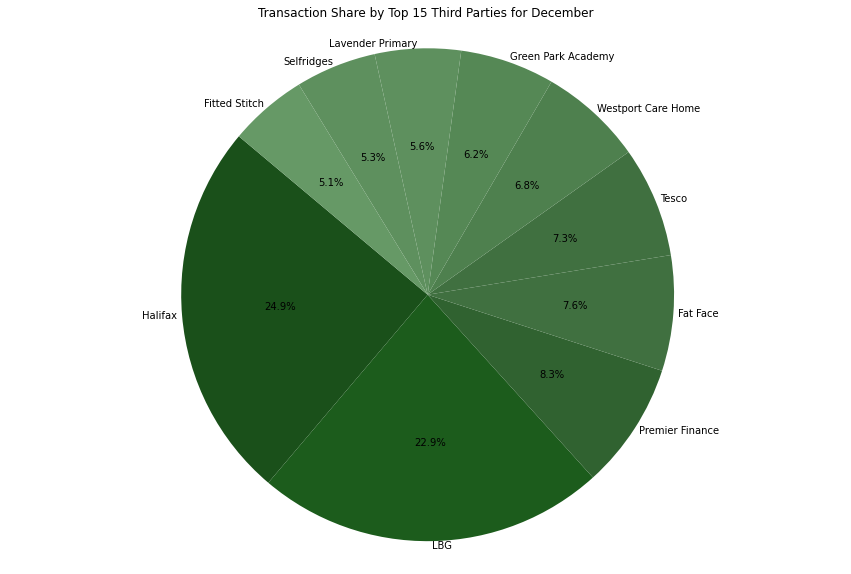

In [75]:
# Convert 'Date' and 'Timestamp' into a single datetime column for easier analysis
df['Datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Timestamp'], format='%d/%m/%Y %H:%M')

# Filter transactions for December
december_transactions = df[df['Datetime'].dt.month == 12]

# Group by third party and sum the absolute amounts
third_party_sums = december_transactions.groupby('Third Party Name')['Amount'].apply(lambda x: x.abs().sum())

# Sort the sums and select the top 15 third parties
top_third_parties = third_party_sums.sort_values(ascending=False).head(10)
colors = ['#1A501A','#1C5C1C','#306230', '#407040', '#407040', '#4E804E', '#558855', '#5E905E', '#5E905E', '#669966']

# Plotting the pie chart
plt.figure(figsize=(15, 10))
plt.pie(top_third_parties, labels=top_third_parties.index, autopct='%1.1f%%', startangle=140,labeldistance=1.02, colors=colors)
plt.title('Transaction Share by Top 15 Third Parties for December')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


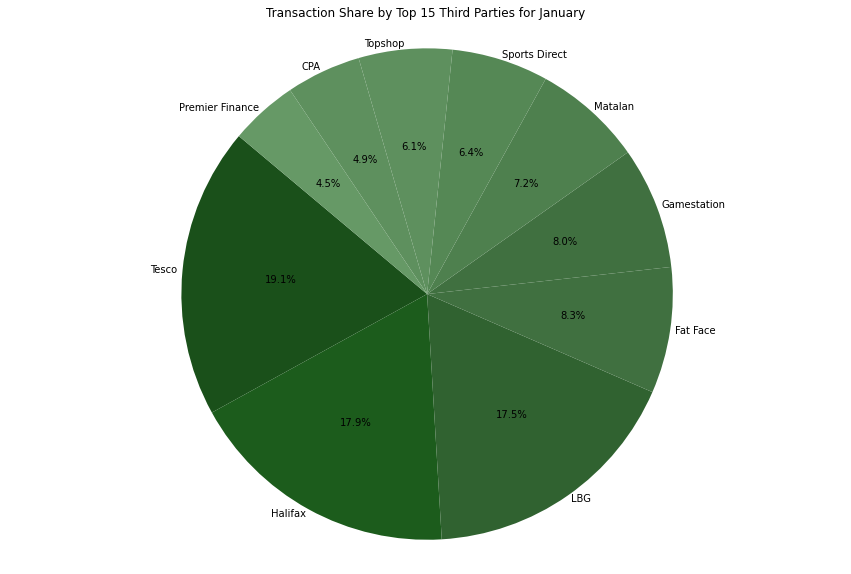

In [77]:
# Filter transactions for December
January_transactions = df[df['Datetime'].dt.month == 1]

# Group by third party and sum the absolute amounts
third_party_sums = January_transactions.groupby('Third Party Name')['Amount'].apply(lambda x: x.abs().sum())

# Sort the sums and select the top 15 third parties
top_third_parties = third_party_sums.sort_values(ascending=False).head(10)
colors = ['#1A501A','#1C5C1C','#306230', '#407040', '#407040', '#4E804E', '#558855', '#5E905E', '#5E905E', '#669966']

# Plotting the pie chart
plt.figure(figsize=(15, 10))
plt.pie(top_third_parties, labels=top_third_parties.index, autopct='%1.1f%%', startangle=140,labeldistance=1.02, colors=colors)
plt.title('Transaction Share by Top 15 Third Parties for January')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()
